#### <h1><center> WebScraping </h1>
<h1><center> Anno Accademico 2022-2023 </h1>
<h1><center>  Docente: Laura Ricci </h1>
<h1><center>  Lezione 17 </h1>
<h1><center>  NetworkX: misure di centralità </h1> 
 <h1><center>  Bitcoin Transaction analysis: correzione assignment </h1>  
<h1><center> 22 Marzo 2023 </h1>

# Analisi di un dataset reale: FriendHook

* analizzeremo un dataset prelevato da una applicazione di social Networking **FriendHook**
    * social networking app per studenti simile a Facebook
* ogni studente è caratterizzato da un profilo
* dopo essersi registrato e aver creato un profilo, uno studente può inviare richieste di amicizia a altri studenti
* lo studente che riceve la richiesta di amicizia può approvare o rifiutare la richiesta
* quando una richiesta è approvata i due studenti sono ufficilamente **amici** e possono condividere contenuti


# Analisi di un dataset reale: FriendHook

* un DataSet prelevato da un sottoinsieme di **Facebook** 

* i dataset a disposizione

    * **Profile.csv** contiene i profili
        * per garantire la privacy è presente l'hash dell'identità dell'utente, invece del dato in chiaro
    * **Friendships.csv** contiene le relazioni di fiducia stabilite tra utenti
    * **Observations** contengono i suggerimenti di nuove amicizie proposte agli studenti e le risposte degli studenti

* in questo esercizio analizzeremo prevaletemente i primi due dataset, con un obiettivo preciso
    
* **un'osservazione importante!**
    * il grafo è stato ricavato da una rete di amicizie più grande
    * si sono considerati alcuni nodi inziali e se ne sono prese le **ego networks**
    * la rete comprende la **ego network** di ognuno di questi nodi
        * il nodo,  i suoi amici e le relazioni di amicizia tra i suoi amici
    * le **ego networks** sono state poi combinate
    * il grafo risultatnte contiene un sottoinsieme di una rete sociale

# Analisi di un dataset reale: FriendHook

In [1]:
import pandas as pd

def summarize_table(df):
    n_rows, n_columns = df.shape
    summary = df.describe()
    print(f"The table contains {n_rows} rows and {n_columns} columns.")
    print("Table Summary:\n")
    print(summary.to_string())

df_profile = pd.read_csv('Dataset/Profiles.csv')
print(df_profile.head())
summarize_table(df_profile)


     Profile_ID           Sex Relationship_Status          Dorm         Major  \
0  b8bc075e54b9  6fb336b554b6        9cea719429e9  4bb4df9e464e  827e5c7758c2   
1  49194b3720b6  6fb336b554b6        ac0b88e46e20  a8e6e404d1b3  3c285c164f0c   
2  f0f5962bbc52  6fb336b554b6        ac0b88e46e20  a8e6e404d1b3  f99bb3b6a185   
3  d42f06d92a52  6fb336b554b6        ac0b88e46e20  2a59be064efd  db85f196a0a8   
4  81123b29ee66  e807eb960650        9cea719429e9  a8e6e404d1b3  141d4cdd5aaf   

           Year  
0  c1a648750a4b  
1  8724226d4754  
2  c1a648750a4b  
3  222a76d38f58  
4  222a76d38f58  
The table contains 4039 rows and 6 columns.
Table Summary:

          Profile_ID           Sex Relationship_Status          Dorm         Major          Year
count           4039          4039                3631          4039          4039          4039
unique          4039             2                   3            15            30             4
top     b8bc075e54b9  e807eb960650        ac0b88e46e20

# Analisi di un dataset reale: Mapping dei valori hash

In [2]:
import numpy as np
category_map = {'9cea719429e9': 0, np.nan: 1, '188f9a32c360': 2, 
                'ac0b88e46e20': 3}

In [3]:
col_to_mapping = {'Relationship_Status': category_map}

for column in df_profile.columns:
    if column in col_to_mapping:
        continue
        
    unique_ids = sorted(set(df_profile[column].values))
    category_map = {id_: i for i, id_ in enumerate(unique_ids)}
    col_to_mapping[column] = category_map
    nums = [category_map[hash_code] 
            for hash_code in df_profile[column].values]
    df_profile[column] = nums

head = df_profile.head()
print(head.to_string(index=False))

 Profile_ID  Sex Relationship_Status  Dorm  Major  Year
       2899    0        9cea719429e9     5     13     2
       1125    0        ac0b88e46e20    12      6     1
       3799    0        ac0b88e46e20    12     29     2
       3338    0        ac0b88e46e20     4     25     0
       2007    1        9cea719429e9    12      2     0


# Analisi di un Dataset reale: Analisi delle amicizie

In [6]:
df_friends = pd.read_csv('Dataset/Friendships.csv')
print(df_friends.head())
summarize_table(df_friends)

       Friend_A      Friend_B
0  b8bc075e54b9  49194b3720b6
1  b8bc075e54b9  f0f5962bbc52
2  b8bc075e54b9  d42f06d92a52
3  b8bc075e54b9  81123b29ee66
4  b8bc075e54b9  b1b65a546a3e
The table contains 88234 rows and 2 columns.
Table Summary:

            Friend_A      Friend_B
count          88234         88234
unique          3646          4037
top     89581f99fa1e  97ba93d9b169
freq            1043           251


In [5]:
import networkx as nx
G = nx.Graph()
for id1, id2 in df_friends.values:
    node1 = col_to_mapping['Profile_ID'][id1]
    node2 = col_to_mapping['Profile_ID'][id2]
    G.add_edge(node1, node2)
    
nodes = list(G.nodes)
num_nodes = len(nodes)
print(f"The social graph contains {num_nodes} nodes.")


The social graph contains 4039 nodes.


# Misure di centralità: Degree centrality

* assegna ai nodi un'importanza basata sul numero di archi incidenti nel nodo

* più formalmente, la centralità di un nodo misura la frazione di archi connessi a quel nodo rispetto al numero totale di archi

* nel nostro caso un nodo centrale corrisponde a uno studente che ha molti amici.


In [11]:
degree_centrality = nx.centrality.degree_centrality(G)  

(sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True))[:8]


[(2145, 0.258791480931154),
 (343, 0.1961367013372957),
 (3819, 0.18697374938088163),
 (1775, 0.13546310054482416),
 (2899, 0.08593363051015354),
 (3989, 0.07280832095096582),
 (3820, 0.07206537890044576),
 (2368, 0.0629024269440317)]

* **nx.centrality.degree_centrality(G)**
    * restituisce un **dictionary** con una chiave per ogni nodo e valore la corrispettiva **degree centrality**
* la funzione **items()** restituisce gli elementi del dizionario
* la funzione **sorted()**
    * ordina gli elementi del dizionario
    * data una tupla, che corrisponde a un elemento del dizionario, considera l'elemento di indice 1 (il secondo) 
      come chiave per l'ordinamento (nel nostro caso il valore della centralità)
    * **reverse=True**, considera l'ordinamento **decrescente**
* si utilizza l'operatore di slicing su liste per prendere i primi **8 elementi** della lista

# Misure di centralità: Degree centrality

In [12]:
(sorted(G.degree, key=lambda item: item[1], reverse=True))[:8]

[(2145, 1045),
 (343, 792),
 (3819, 755),
 (1775, 547),
 (2899, 347),
 (3989, 294),
 (3820, 291),
 (2368, 254)]

* analisi del numero di vicini dei nodi che hanno maggior valore di centralità
* i nodi con alta centralità sono probabilmente quelli di cui si sono considerate le ego-networks

# Distribuzione della Degree Centrality

Text(0, 0.5, 'Numero Nodi')

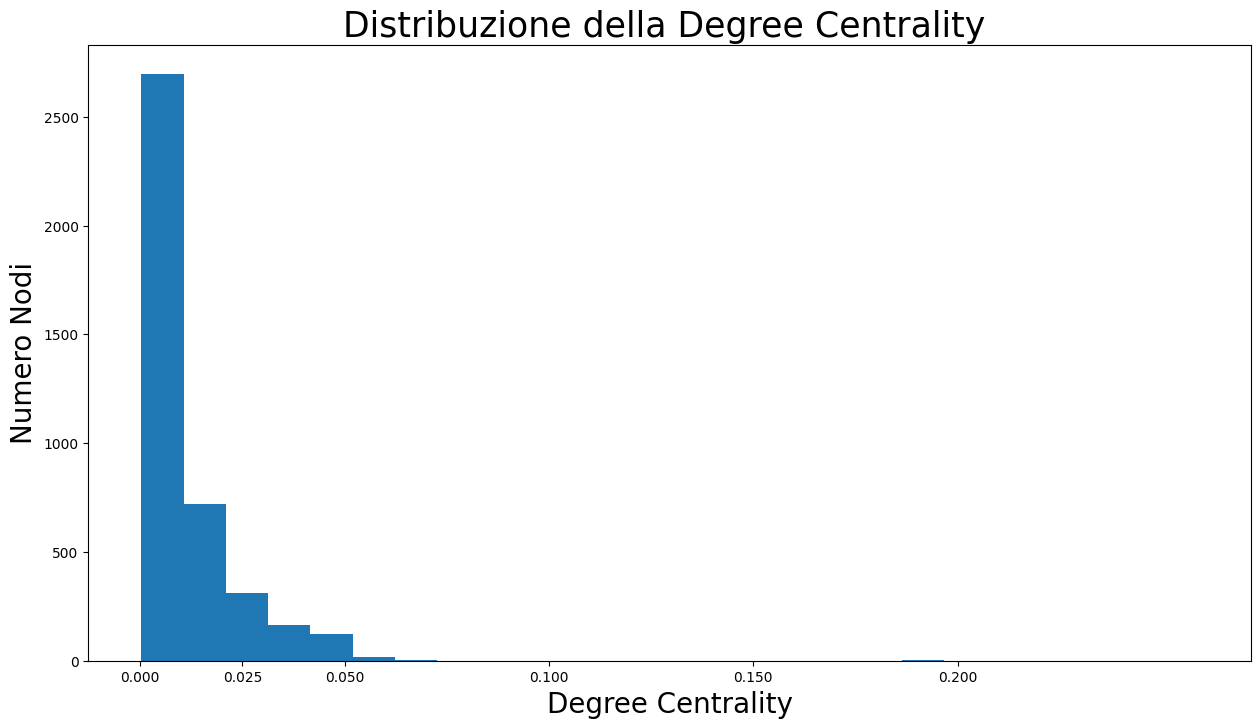

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
plt.hist(degree_centrality.values(), bins=25)
plt.xticks(ticks=[0, 0.025, 0.05, 0.1, 0.15, 0.2]) 
plt.title("Distribuzione della Degree Centrality ", fontdict={"size": 25}, loc="center")
plt.xlabel("Degree Centrality", fontdict={"size": 20})
plt.ylabel("Numero Nodi", fontdict={"size": 20})

# Visualizzazione della centralità dei nodi: degree centrality

(-1.203868634700775,
 1.145474679470062,
 -1.0618530157208443,
 1.1813934090733529)

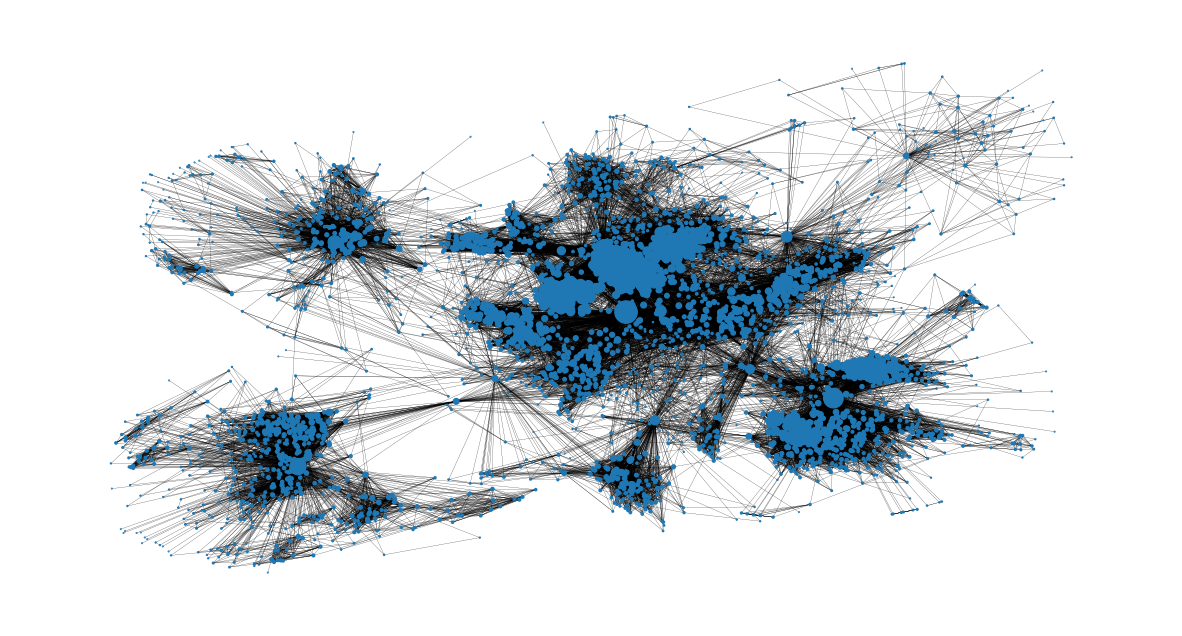

In [10]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
node_size = [v * 1000 for v in degree_centrality.values()]  
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")


* la dimensione di un nodo dipende dalla sua misura di centralità

# Misure di centralità: Betweeness Centrality

* dato un nodo, misura il **numero di cammini minimi** che passano per esso
    * misura quanto un  nodo si comporti come **un bridge**

* più formalmente, misura la percentuale di tutti i cammini minimi del grafo che passano per quel nodo

* calcolata dal metodo
```python
betweenness_centrality(G, k=None, normalized=True, weight=None, endpoints=False, seed=None)
```
* solo il primo parametro è necessario

* Il parametro $k$ restringe il numero di nodi del grafo tra cui calcolare i cammini minimi
    * vengono estratti $k$ nodi in modo casuale( in questo caso è significativo anche il **seed**)
    * utilizzato per diminuire il tempo di esecuzione dell'algoritmo:  il tempo di computazione dell'algoritmo è alto
    
* viene restituito un dictionary che associa ad ogni nodo selezionato il corrispettivo valore di betweenness.

* la **betweenness centrality** può essere valutata sugli archi, invece che sui nodi, con il metodo 

```python
edge_betweenness_centrality(G, k=None, normalized=True, weight=None, seed=None)
```

# Misure di centralità: Betweeness Centrality

In [14]:
betweenness_centrality = nx.centrality.betweenness_centrality(G)  

(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True))[:8]


[(2145, 0.4805180785560152),
 (343, 0.3377974497301997),
 (1775, 0.236115357358927),
 (3819, 0.22929533958687828),
 (1659, 0.1490150921166576),
 (2899, 0.14630592147443144),
 (3437, 0.11533045020561003),
 (1977, 0.09631033121856167)]

* osservazioni
    * il nodo **2145** ha una centralità di **0.48**, ovvero viene attraversato dalla metà dei cammini minimi
    * confrontiamo i valori della betweness centrality con quelli della degree centrality, sotto elencati
    
    ```python
  (2145, 0.258791480931154),
  (343, 0.1961367013372957),
  (3819, 0.18697374938088163),
  (1775, 0.13546310054482416),
  (2899, 0.08593363051015354),
  (3989, 0.07280832095096582),
  (3820, 0.07206537890044576),
  (2368, 0.0629024269440317)
    ```
* alcuni nodi sono in entrambe le liste
* esistono nodi, come il **1659**, che betweeness centrality alta e degree centrality bassa
* un nodo
    * con pochi vicini (amici)
    * ma che si comporta come un **bridge** tra sottoreti diverse

# Distribuzione della betweeness centrality

Text(0, 0.5, 'Counts')

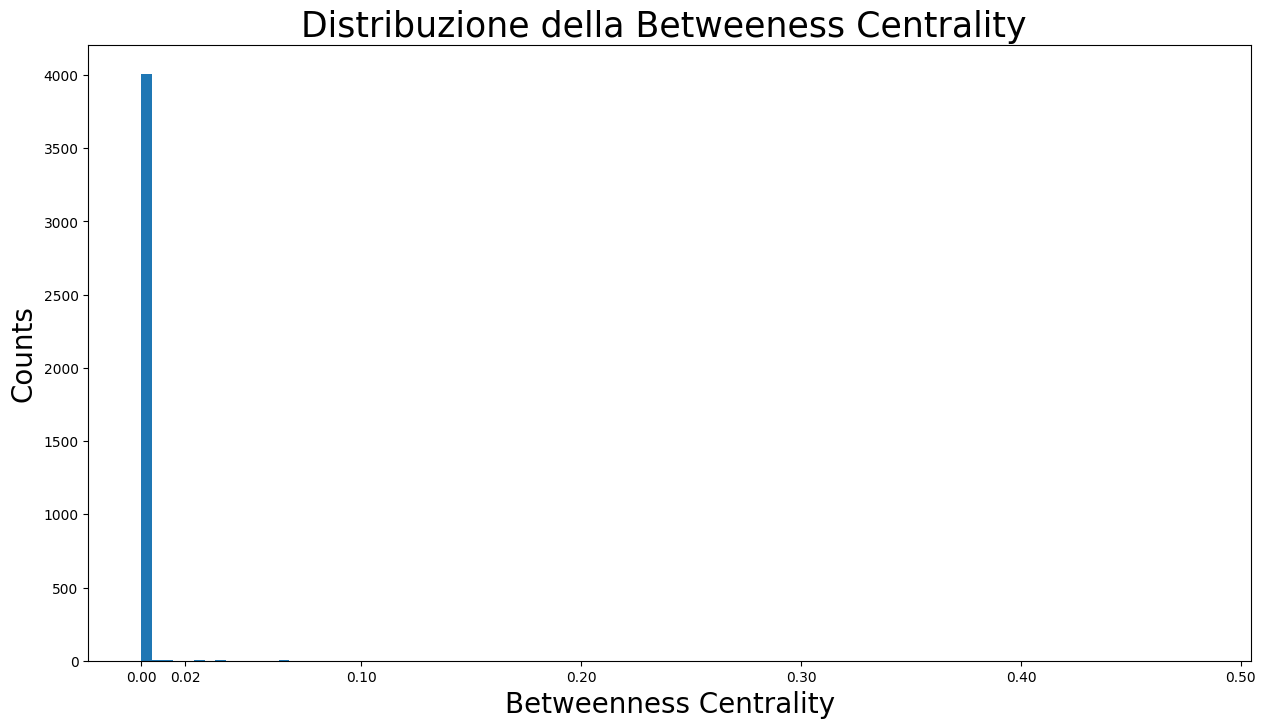

In [15]:
plt.figure(figsize=(15, 8))
plt.hist(betweenness_centrality.values(), bins=100)
plt.xticks(ticks=[0, 0.02, 0.1, 0.2, 0.3, 0.4, 0.5])  # set the x axis ticks
plt.title("Distribuzione della Betweeness Centrality ", fontdict={"size": 25}, loc="center")
plt.xlabel("Betweenness Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

# Visualizzazione della centralità dei nodi: betweness centrality

(-1.203868634700775,
 1.145474679470062,
 -1.0618530157208443,
 1.1813934090733529)

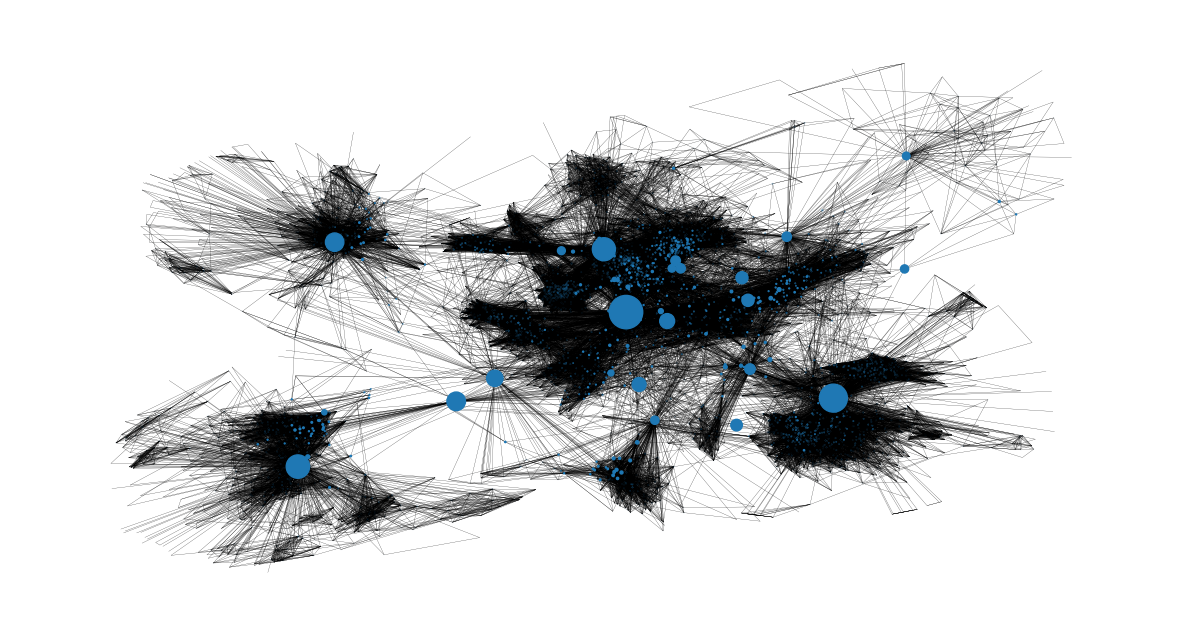

In [17]:
node_size = [
    v * 1200 for v in betweenness_centrality.values()
]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")


# Misure di Centralità: Closeness Centrality

* misura la distanza media del nodo ripetto agli altri nodi della rete

    * piu' i valori della closeness centrality sono elevati piu' il nodo e' **centrale**
    
* Il metodo per il calcolo della closeness centrality  è:

```python
closeness_centrality(G, u=None, distance=None, wf_improved=True, reverse=False)
```

* può essere utilizzata, ad esempio, per studiare una buona strategia di propagazione delle **fake news** o dei **virus**
    * un utente con alta **closeness centrality** può diffondere un virus oppure una fake news più rapidamente
    * l'intera rete viene raggiunta rapidamente
 


In [18]:
closeness_centrality = nx.centrality.closeness_centrality(G)  
(sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True))[:8]


[(2145, 0.45969945355191255),
 (2847, 0.3974018305284913),
 (3747, 0.3948371956585509),
 (467, 0.3939127889961955),
 (343, 0.39360561458231796),
 (3528, 0.37049270575282134),
 (1787, 0.36991572004397216),
 (370, 0.3698479575013739)]

# Distribuzione della closeness centrality



Text(0, 0.5, 'Counts')

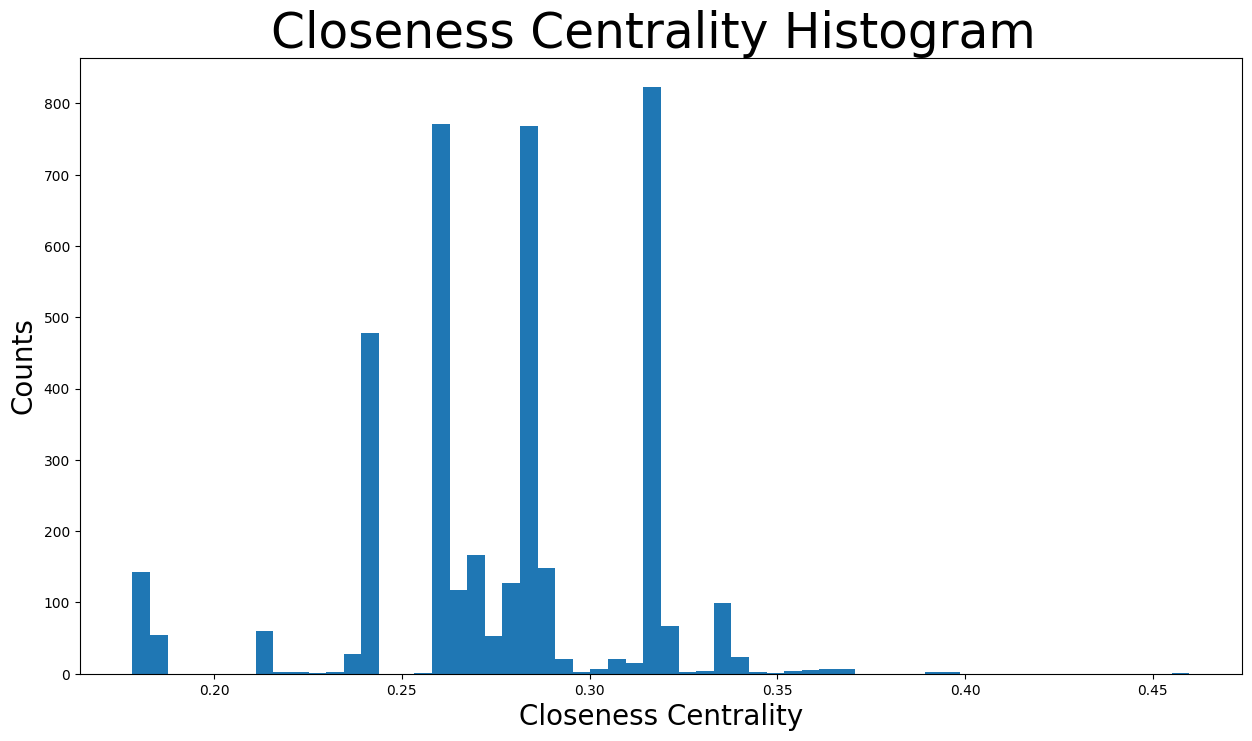

In [19]:
plt.figure(figsize=(15, 8))
plt.hist(closeness_centrality.values(), bins=60)
plt.title("Closeness Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Closeness Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

# Visualizzazione della centralità dei nodi: closeness centrality

(-1.203868634700775,
 1.145474679470062,
 -1.0618530157208443,
 1.1813934090733529)

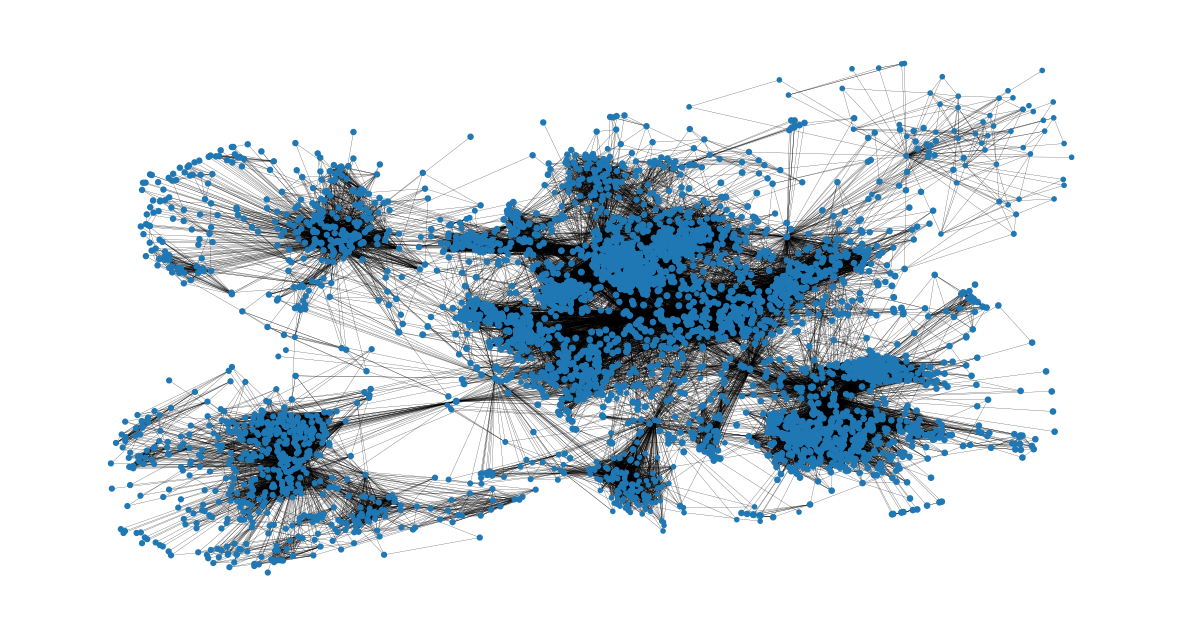

In [20]:
node_size = [
    v * 50 for v in closeness_centrality.values()
]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")

# Misure di centralità: Eigenvector centrality

* una estensione della **degree centrality**
* misura quanto un nodo può influenzare la rete
    * il nodo è connesso ad altri nodi **importanti** della rete
    * pe ril nostro dataset, un nodo è importante "se ha amici importanti"
    * una variante del **pagerank**
    
```python
eigenvector_centrality(G, max_iter=100, tol=1e-06, nstart=None, weight=None)
```

In [21]:
eigenvector_centrality = nx.centrality.eigenvector_centrality(G)  
(sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True))[:10]


[(3819, 0.09540696149067633),
 (84, 0.08698327767886553),
 (1601, 0.08605239270584342),
 (3059, 0.08517340912756598),
 (2860, 0.08427877475676092),
 (261, 0.08419311897991796),
 (1279, 0.08415573568055032),
 (2570, 0.08413617041724977),
 (1344, 0.08367141238206226),
 (1651, 0.0835324284081597)]

# Distribuzione della eigenvector centrality

Text(0, 0.5, 'Counts')

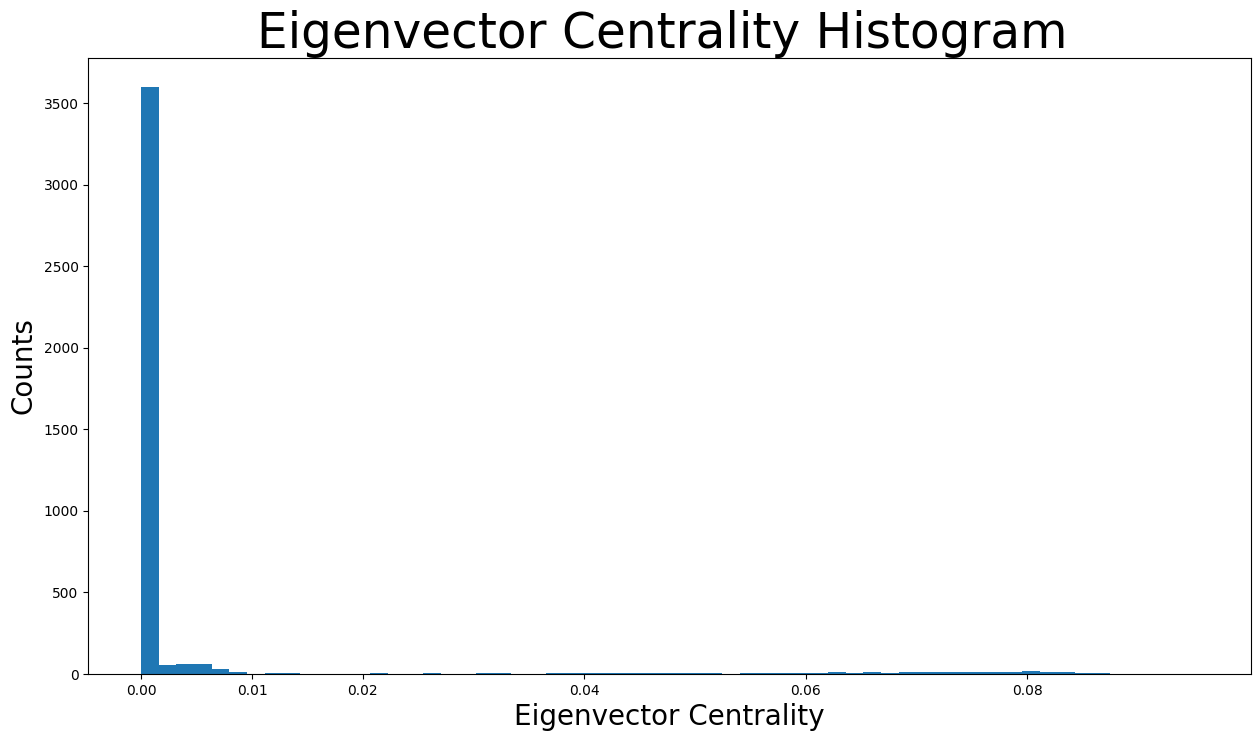

In [22]:
plt.figure(figsize=(15, 8))
plt.hist(eigenvector_centrality.values(), bins=60)
plt.xticks(ticks=[0, 0.01, 0.02, 0.04, 0.06, 0.08])  # set the x axis ticks
plt.title("Eigenvector Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Eigenvector Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

# Visualizzazione della centralità dei nodi: eigrnvector centrality

(-1.203868634700775,
 1.145474679470062,
 -1.0618530157208443,
 1.1813934090733529)

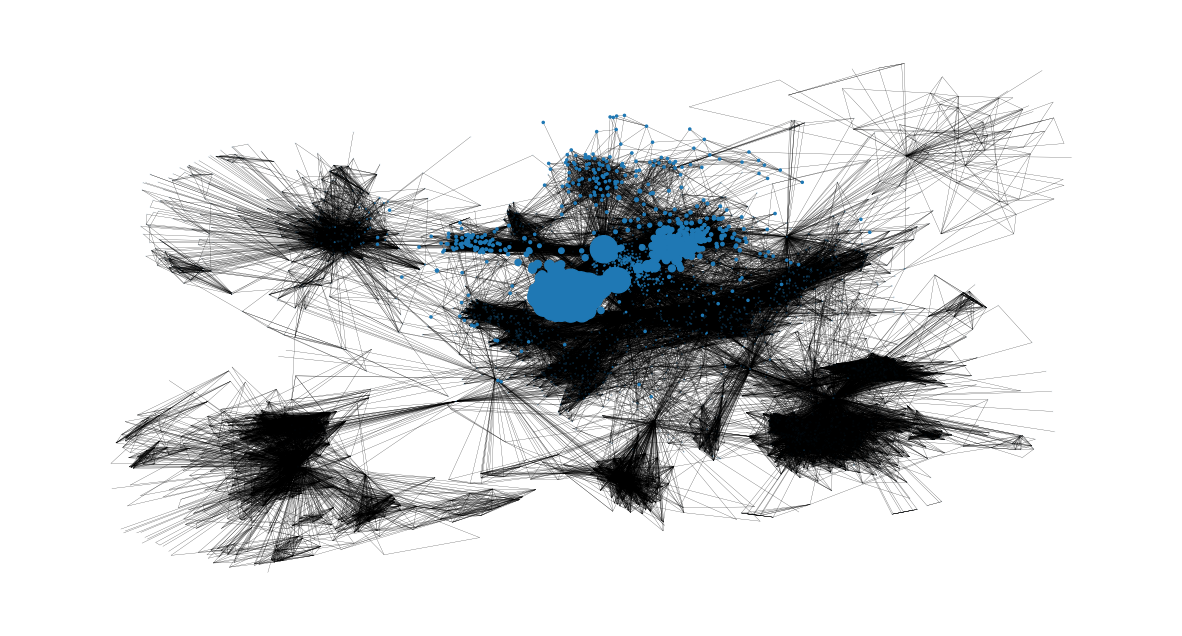

In [23]:
node_size = [
    v * 4000 for v in eigenvector_centrality.values()
]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")

# Assignment: Analisi delle transazioni di Bitcoin


<center>
<img src="Figures/BitcoinTransactionChain.jpg" style="width:800px;height:400px;"/>


# Astrazione delle transazioni di Bitcoin: il dataset

<center>
<img src="Figures/BitcoinTables.jpg" style="width:700px;height:600px;"/>

# Astrazioni effettuate nel dataset

I principali elementi di una transazione **Bitcoin** sono i seguenti
<ul>
<li><b>hash</b>: identificatore della transazione </li>
<li><b>block_id</b>: identificatore del blocco che contiene la transazione </li>
<li><b>version</b></li>
<li><b>size</b></li>
<li><b>lock_time</b>: tempo prima del quale una transazione non può essere inserita in un blocco</li>
<li><b>vin_sz</b></li>
<li><b>vout_sz</b></li>
<li><b>inputs</b></li>
<li><b>outputs</b></li>
</ul>

I campi eliminati nel nostro dataset sono i seguenti:
<ul>
<li><b>version</b></li>
<li><b>size</b></li>
<li><b>lock_time</b></li>
<li><b>vin_sz</b></li>
<li><b>vout_sz</b></li>
</ul>

* nel dataset, tutti i campi   <b>hash</b> sono stati sostituiti con un identificatore numerico <b>id</b>

* questo ha permesso di ridurre la dimensione del dataset

* inoltre le chievi pubbliche e le corrispondenti firme sono astatte da identificatori

# Analisi richieste


* controllare se esistono blocchi o transazioni invalide nel dataset ed eventualmente rimuoverli/e
* calcolare le seguenti statistiche
    * distribuzione dei blocchi: numero di transazioni per ogni blocco, considerando l'intero periodo di tempo e per mese
    * distribuzione delle fee spese in ogni transazione nell'intero periodo
    * quanti UXTO esistono, al momento del mining dell'ultimo blocco del data set?
    * quale è l'UXTO a cui è associato il valore più alto?
    * trovare tutte le transazioni generate tra due date
* proporre almeno una analisi non compresa tra le precedenti

# Analisi di Bitcoin: il DataFrame delle transazioni

In [24]:
import pandas as pd
import matplotlib as mat

#costruzione dei DataFrames

Transactions = pd.read_csv('Dataset/Transactions.csv',names=['tx_id', 'blk_id'])
Inputs = pd.read_csv('DataSet/Inputs.csv', names=['in_id', 'tx_id', 'sig_id', 'output_id'])
Outputs = pd.read_csv('DataSet/Outputs.csv', names=['output_id', 'tx_id', 'pk_id', 'value'])

print(Transactions.head())
print(Transactions.tail())


   tx_id  blk_id
0      1       0
1      2       1
2      3       2
3      4       3
4      5       4
         tx_id  blk_id
216621  216622  100016
216622  216623  100016
216623  216624  100016
216624  216625  100016
216625  216626  100017


# Analisi  di Bitcoin: il DataFrame degli Inputs

In [25]:
print(Inputs.head())
print(Inputs.tail())


   in_id  tx_id  sig_id  output_id
0      1      1       0         -1
1      2      2       0         -1
2      3      3       0         -1
3      4      4       0         -1
4      5      5       0         -1
         in_id   tx_id  sig_id  output_id
292422  292423  216622   95854     258874
292423  292424  216623  161394     247315
292424  292425  216624  173913     263227
292425  292426  216625  174188     263611
292426  292427  216626       0         -1


# Analisi di Bitcoin: il DataFrame degli Outputs

In [31]:
print(Outputs.head())
print(Outputs.tail())


   output_id  tx_id  pk_id       value
0          1      1      1  5000000000
1          2      2      2  5000000000
2          3      3      3  5000000000
3          4      4      4  5000000000
4          5      5      5  5000000000
        output_id   tx_id   pk_id       value
264305     264306  216623  174700     1000000
264306     264307  216623  174701   299000000
264307     264308  216624  167815     1000000
264308     264309  216625  174695     1200000
264309     264310  216626  174701  5000000000


# Controlli di validità delle transazioni

* Quali controlli è possibile fare?

    * Input/output che fanno riferimento ad un tx_id non contenuto in nessun blocco
    * Input che fanno riferimento ad un output_id non esistente
    * Transazioni con pk_id/sign_id negativi
    * Output con campo “amount” negativo
    * Transazioni in double spending
    * Reward per il miner minore di 50 btc
    * Si cercano di spendere dei bitcoin appartenenti ad un indirizzo diverso dal proprio 
        * la chiave pubblica non è consistente con la firma
        * nel nostro caso, l'identificatore nell'output non corrisponde con quello nell'input


# Controlli di validità delle transazioni: corrispondenza chiave pubblica-firma

* le chiavi pubbliche e le firme sono astratte nel datset con degli identificatori
* la corrispondenza tra chiave pubblica e signature è verificata in **Bitcoin** da uno script **FORTH** 
* nel nostro caso occorre verificare solamente la corrispondenza tra gli identificatori

In [26]:
#ricerca di record collegati tra input e output che non hanno i campi sig_id e pk_id uguali
    
print("ricerca corrispondenza errate tra pk_id e sig_id")
print()

InputOutput = pd.merge(Outputs, Inputs, on="output_id")

print(InputOutput.head())
print()

Invalid_pk_sig = InputOutput.loc[InputOutput ['sig_id'] != InputOutput ['pk_id']]

print("Transazioni inconsistenti trovate =", len(Invalid_pk_sig.index))
print()
print(Invalid_pk_sig)


ricerca corrispondenza errate tra pk_id e sig_id

   output_id  tx_id_x  pk_id       value   in_id  tx_id_y  sig_id
0         10       10     10  5000000000     172      172      10
1        172      172    172  1000000000  219200   156787     172
2        173      172     10  4000000000     184      184      10
3        186      184     10  3000000000     186      186      10
4        188      186    186   100000000     228      228     186

Transazioni inconsistenti trovate = 2

       output_id  tx_id_x   pk_id       value   in_id  tx_id_y  sig_id
1678       16121    16081   16020  5000000000  194075   138278  139250
83064     137338   116208  113300  5000000000  157972   116411      -1


# Controlli di validità delle transazioni: corrispondenza chiave pubblica-firma

* **merge**: una **join** su cui si può specificare la colonna su cui fondere i dataframe
    * per default calcola un **inner join**
    * calcola l'intersezione dei due **DataFrame**
  
* per individuare le transazioni invalide, si sfrutta uno dei tanti modi di utilizzare la funzione **Python loc**

    * si crea un   **row indexer**, un Serie di valori **Booleani**
    ```python 
    InputOutput.loc[InputOutput ['sig_id'] != InputOutput ['pk_id']]
    ```
    * la Serie è creata confrontando valori corrispondenti delle due serie, corrispondenti a due colonne del **DataFrame**
    ```python 
    InputOutput ['sig_id'] 
    InputOutput ['pk_id']
    ```
    
* si passa il **row indexer** di valori booleani alla funzione **loc**
* la **Series** di valori booleani deve essere **allineata** con le righe del **DataFrame**    
* solo le righe in cui il valore corrispondente in **row indexer** è **True**, vengono selezionate 
* viene costruito un nuovo **DataFrame** con le righe selezionate

# Calcolo valore totale UTXO: individuazione output non spesi

* quale è il valore degli UXTO, al momento del mining dell'ultimo blocco del data set?
* **UXTO** valori non ancora spesi, stanno nell'output di una transazione, ma non sono riferiti dall'input di nessuna altra transazione


In [27]:
print("Calcolo valore totale in UXTO")

# ricerca gli Output non spesi
# ovvero gli Output che non hanno una corrispondenza in Inputs
# essi rappresentano gli UTXO (Unspent Transaction Outputs)

temp = (~Outputs['output_id'].isin(Inputs['output_id']))
print(type(temp))
print(temp.describe())
print(temp.head())


Calcolo valore totale in UXTO
<class 'pandas.core.series.Series'>
count     264310
unique         2
top        False
freq      192404
Name: output_id, dtype: object
0    True
1    True
2    True
3    True
4    True
Name: output_id, dtype: bool


* si utilizza la funzione:
   ```python 
    S.isin(V)
    ```

* controlla se gli elementi della series **S**  sono contenuti nella serie  **V**
* restituisce una **Series di valori booleani** che indica
    * per ogni elemento della serie **S**, se quell'elemento è contenuto nella sequenza  **V**
    * tale serie di valori booleani verrà poi passata alla funzione **loc**

# Calcolo valore totale UTXO: individuazione output non spesi

In [28]:
print("CALCOLO TOTALE UTXO")

# ricerca gli Output non spesi
# ovvero gli Output che non hanno una corrispondenza in Inputs
# essi rappresentano gli UTXO (Unspent Transaction Outputs)


UTXO = Outputs.loc[temp]
print(UTXO)
print()
UTXO_values = UTXO.value
print(UTXO_values)

CALCOLO TOTALE UTXO
        output_id   tx_id   pk_id       value
0               1       1       1  5000000000
1               2       2       2  5000000000
2               3       3       3  5000000000
3               4       4       4  5000000000
4               5       5       5  5000000000
...           ...     ...     ...         ...
264305     264306  216623  174700     1000000
264306     264307  216623  174701   299000000
264307     264308  216624  167815     1000000
264308     264309  216625  174695     1200000
264309     264310  216626  174701  5000000000

[71906 rows x 4 columns]

0         5000000000
1         5000000000
2         5000000000
3         5000000000
4         5000000000
             ...    
264305       1000000
264306     299000000
264307       1000000
264308       1200000
264309    5000000000
Name: value, Length: 71906, dtype: int64


# Uso della funzione loc

* si è sfruttaro uno dei tanti modi di utilizzare la funzione ```python loc```

    * si passa un oggetto di tipo **Series** di valori booleani
     ```python 
    Outputs.loc[temp]
    ```
    * la **Series** di booleani deve esssere **allineata** con le righe del **DataFrame**
        **row indexer**
    * solo le righe in cui il valore corrispondente in **row indexer** è True, vengono selezionate 
    * viene costruito un nuovo **DatFrame** con le righe selezionate
    

 
* viene costruito un nuovo Dataframe **UXTO** con gli output che non vengono riferiti da nessun input, gli **UXTO**

# Calcolo dell'UTXO massimo

* quale è l'UXTO a cui è associato il valore più alto?

In [30]:
#ricerca del valore massimo
MaxUTXO = UTXO_values.max()

#cerco la somma di tutti i valori
SumUTXO = UTXO_values.sum()

MaxUTXO_tx = UTXO.loc[UTXO['value'] == MaxUTXO] #cerco la riga  con valore massimo
MaxUTXO_tx = pd.merge(MaxUTXO_tx, Transactions, on=['tx_id'])

print()
print("UTXO con il massimo valore in output:")
print()
print(MaxUTXO_tx)
print()
print("Somma totale UTXO =" , SumUTXO )


UTXO con il massimo valore in output:

   output_id   tx_id   pk_id          value  blk_id
0     170430  140479  138895  9000000000000   90532

Somma totale UTXO = 500140414333354


# Approfondimento: accessi a DataFrame

* accesso alle colonne di un **Dataframe** avviene 
    * racchiudendo il nome della colonna  a cui siamo interessati tra **[ ]**
        * **attribute access** si accede in base al nome dell'attributo che corrisponde alla colonna
        * restituisce una **Series** corrispondente alla colonna
* possibile passare anche una lista di colonne
    * verranno restituite le **Series** corrispondenti a quelle colonne

# Approfondimento: accessi al DataFrame, la  funzione **loc**

* per selezionare un sottoinsieme delle righe del **DataFrame**, la funzione **loc** può ricevere parametri di diverso tipo
    * valori **scalari**
        * 5, 'a' 
        * nota bene: 5 è considerata una label, non un indice!
    * una lista di valori scalari['a','b','c']
    * una **slice**'a':'f'
    * un vettore di valori booleani allineato con le righe del **DataFrame**
    * una **Series** di valori boolenai
    *.....

# Approfondimento: accessi al DataFrame, loc con scalari


```python 
    df.loc['pippo']
```
* in questo caso il valore scalare rappresenta la **label** che identifica una delle righe del **DataFrame**
* le label sono state associate alle righe del **DataFrame**
* per default le label sono gli **indici** delle righe
    * ma c'è differenza tra indice e label!

```python 
    df.loc[0:2, 'col1':'col4'] 
```

# Approfondimento: accessi al DataFrame, loc con liste

```python 
    df.loc[['pippo','pluto','minnie']] 
    df.loc[:, ['col1', 'col2']]
    df.loc[['pippo','pluto','minnie'], ['pippo','pluto','minnie']]
```



# Approfondimento: accessi al DataFrame, loc con array booleani

```python 
    df.loc[df['col1']=='Val1']
```